# ***Telecom Churn Case Study - Kaggle***

## Created by - Nirosh Kumar and Pranjal Verma


### Problem Statement

In the telecommunications industry, customers have the flexibility to choose from multiple service providers and can easily switch from one operator to another. This competitive landscape results in an average annual churn rate of 15-25%. Given that acquiring a new customer is 5-10 times more expensive than retaining an existing one, customer retention has become a higher priority than customer acquisition.

For many established operators, retaining highly profitable customers is the top business objective. To address the issue of customer churn, telecom companies need to predict which customers are at a high risk of leaving. By proactively identifying these customers, they can take measures to retain them and reduce churn.

### Project Overview

In the telecommunications industry, customers have the flexibility to choose from multiple service providers and can easily switch from one operator to another. This competitive landscape results in an average annual churn rate of 15-25%. Given that acquiring a new customer is 5-10 times more expensive than retaining an existing one, customer retention has become a higher priority than customer acquisition.

For many established operators, retaining highly profitable customers is the top business objective. To address the issue of customer churn, telecom companies need to predict which customers are at a high risk of leaving. By proactively identifying these customers, they can take measures to retain them and reduce churn.

## Data Import and Understanding

In [157]:
## Import the library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [158]:
## Read the dataset

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv")
data_dict = pd.read_csv("data_dictionary.csv")

In [159]:
## Shape of the data 

print("Train dataset Dimenstion", train.shape)
print("Test dataset Dimenstion", test.shape)
print("Sample dataset Dimenstion", sample.shape)
print("Data_dict dataset Dimenstion", data_dict.shape)

Train dataset Dimenstion (69999, 172)
Test dataset Dimenstion (30000, 171)
Sample dataset Dimenstion (30000, 2)
Data_dict dataset Dimenstion (36, 2)


In [160]:
## Train Data Inspection
pd.set_option('display.max_columns', 200)
train.info(verbose=1)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [161]:
## summary
train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [162]:
## Checking the null value

(train.isnull().sum()/len(train)) *100

id                   0.000000
circle_id            0.000000
loc_og_t2o_mou       1.002871
std_og_t2o_mou       1.002871
loc_ic_t2o_mou       1.002871
                       ...   
aon                  0.000000
aug_vbc_3g           0.000000
jul_vbc_3g           0.000000
jun_vbc_3g           0.000000
churn_probability    0.000000
Length: 172, dtype: float64

## 2. Data cleaning and  Preparation

In [163]:
## Unique value
cols_with_single_value = []
for col in train.columns:
    if train[col].nunique() == 1:
        cols_with_single_value.append(col)

print(cols_with_single_value)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [164]:
# Inspecting the cols_with_single_value
for col in cols_with_single_value:
    print(col)
    print(train[col].value_counts(dropna=False))
    print()

circle_id
circle_id
109    69999
Name: count, dtype: int64

loc_og_t2o_mou
loc_og_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64

std_og_t2o_mou
std_og_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64

loc_ic_t2o_mou
loc_ic_t2o_mou
0.0    69297
NaN      702
Name: count, dtype: int64

last_date_of_month_6
last_date_of_month_6
6/30/2014    69999
Name: count, dtype: int64

last_date_of_month_7
last_date_of_month_7
7/31/2014    69600
NaN            399
Name: count, dtype: int64

last_date_of_month_8
last_date_of_month_8
8/31/2014    69266
NaN            733
Name: count, dtype: int64

std_og_t2c_mou_6
std_og_t2c_mou_6
0.0    67231
NaN     2768
Name: count, dtype: int64

std_og_t2c_mou_7
std_og_t2c_mou_7
0.0    67312
NaN     2687
Name: count, dtype: int64

std_og_t2c_mou_8
std_og_t2c_mou_8
0.0    66296
NaN     3703
Name: count, dtype: int64

std_ic_t2o_mou_6
std_ic_t2o_mou_6
0.0    67231
NaN     2768
Name: count, dtype: int64

std_ic_t2o_mou_7
std_ic_t2o_mou_7
0.0    

In [165]:
#  Remove Columns - Single Unique Values from the training set
train.drop(cols_with_single_value, axis=1, inplace=True)

# Remove Columns - Single Unique Value from the test set
test.drop(cols_with_single_value, axis=1, inplace=True)

In [166]:
# Removing the Id column
train.drop('id', axis=1, inplace=True)

In [167]:
# ## Splitting Columns into Numerical and Categorical
def split_columns_by_type(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    date_cols = df.select_dtypes(include=['object']).columns.tolist()
    cat_cols = ['night_pck_user_6',
            'night_pck_user_7',
            'night_pck_user_8',
            'fb_user_6',
            'fb_user_7',
            'fb_user_8',
           ]

    numerical_cols = [col for col in numerical_cols if col not in cat_cols]

    return {
        'numerical': numerical_cols,
        'date': date_cols,
        'categorical': cat_cols
    }

columns_by_type = split_columns_by_type(train)
cat_cols = columns_by_type['categorical']
# Print the result
print("Numerical Columns:", columns_by_type['numerical'])
print()
print("Categorical Columns:", columns_by_type['categorical'])
print()
print("Date Columns:", columns_by_type['date'])

Numerical Columns: ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc

In [168]:

## Droping the date column no used for the analysis in the train data 
train.drop(columns=columns_by_type['date'], axis=1, inplace=True)

## Droping the date column no used for the analysis in the test data 
test.drop(columns=columns_by_type['date'], axis=1, inplace=True)

In [169]:
# Calculate the percentage of missing values per column
mv_train_set = round(100 * (train.isna().sum(axis=0) / train.shape[0]), 2)

# Filter and sort columns with more than 70% missing values
columns_with_missing_data = mv_train_set[mv_train_set > 70].sort_values(ascending=False)

# Print the columns with more than 70% missing values
print(columns_with_missing_data)


total_rech_data_6     74.90
arpu_3g_6             74.90
max_rech_data_6       74.90
fb_user_6             74.90
count_rech_2g_6       74.90
night_pck_user_6      74.90
count_rech_3g_6       74.90
arpu_2g_6             74.90
av_rech_amt_data_6    74.90
fb_user_7             74.48
night_pck_user_7      74.48
arpu_2g_7             74.48
arpu_3g_7             74.48
av_rech_amt_data_7    74.48
total_rech_data_7     74.48
count_rech_3g_7       74.48
count_rech_2g_7       74.48
max_rech_data_7       74.48
av_rech_amt_data_8    73.69
count_rech_3g_8       73.69
arpu_3g_8             73.69
count_rech_2g_8       73.69
arpu_2g_8             73.69
max_rech_data_8       73.69
night_pck_user_8      73.69
total_rech_data_8     73.69
fb_user_8             73.69
dtype: float64


In [170]:
missing_values_list = mv_train_set[(mv_train_set > 0) & (mv_train_set <= 70)].index
print(missing_values_list)

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6',
       'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7',
       'lo

1. Grouping and Treating Missing Values for 'Recharge-Related' Data
2. Grouping and Treating Missing Values for 'ARPU' Data
3. Conducting Missing Value Treatment on Categorical Columns                                    

### Recharge-Related Column

In [171]:
recharge_cols = train.columns[train.columns.str.contains('_rech_')]
print(recharge_cols)

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8'],
      dtype='object')


In [172]:
# Replacing NaN values in recharge related columns with 0 in the training and testing set
train[recharge_cols] = train[recharge_cols].fillna(0)
test[recharge_cols] = test[recharge_cols].fillna(0)
print("Train set")
print(train[recharge_cols].isnull().sum()*100/train.shape[1])
print("Test set")
print(test[recharge_cols].isnull().sum()*100/test.shape[1])

Train set
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
count_rech_2g_6       0.0
count_rech_2g_7       0.0
count_rech_2g_8       0.0
count_rech_3g_6       0.0
count_rech_3g_7       0.0
count_rech_3g_8       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
dtype: float64
Test set
total_rech_num_6      0.0
total_rech_num_7      0.0
total_rech_num_8      0.0
total_rech_amt_6      0.0
total_rech_amt_7      0.0
total_rech_amt_8      0.0
max_rech_amt_6        0.0
max_rech_amt_7        0.0
max_rech_amt_8        0.0
total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
max_rech_data_6       0.0
max_

## ARPU Columns

In [173]:
arpu_cols = train.columns[train.columns.str.contains('arpu_')]
print(arpu_cols)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8',
       'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8'],
      dtype='object')


In [174]:
# Replacing NaN values in ARPU related columns with 0 in the training and testing set
train[arpu_cols] = train[arpu_cols].fillna(0)
test[arpu_cols] = test[arpu_cols].fillna(0)
print("Train set")
print(train[arpu_cols].isnull().sum()*100/train.shape[1])
print("Test set")
print(test[arpu_cols].isnull().sum()*100/test.shape[1])

Train set
arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64
Test set
arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64


In [175]:
# Replacing NaN values in ARPU related columns with 0 in the test set
test[arpu_cols] = test[arpu_cols].fillna(0)
print(test[arpu_cols].isnull().sum()*100/test.shape[1])

arpu_6       0.0
arpu_7       0.0
arpu_8       0.0
arpu_3g_6    0.0
arpu_3g_7    0.0
arpu_3g_8    0.0
arpu_2g_6    0.0
arpu_2g_7    0.0
arpu_2g_8    0.0
dtype: float64


## Categorical Columns   

In [176]:
train[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  17568 non-null  float64
 1   night_pck_user_7  17865 non-null  float64
 2   night_pck_user_8  18417 non-null  float64
 3   fb_user_6         17568 non-null  float64
 4   fb_user_7         17865 non-null  float64
 5   fb_user_8         18417 non-null  float64
dtypes: float64(6)
memory usage: 3.2 MB


In [177]:
test[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  7585 non-null   float64
 1   night_pck_user_7  7706 non-null   float64
 2   night_pck_user_8  7922 non-null   float64
 3   fb_user_6         7585 non-null   float64
 4   fb_user_7         7706 non-null   float64
 5   fb_user_8         7922 non-null   float64
dtypes: float64(6)
memory usage: 1.4 MB


### Deriving New Features

In [178]:
# Deriving new columns for Total Data Recharge Amount' in the training set
train['total_rech_data_amt_6'] = train['total_rech_data_6'] * train['av_rech_amt_data_6']
train['total_rech_data_amt_7'] = train['total_rech_data_7'] * train['av_rech_amt_data_7']

train['total_amt_6'] = train['total_rech_data_amt_6'] + train['total_rech_amt_6']
train['total_amt_7'] = train['total_rech_data_amt_7'] + train['total_rech_amt_7']

train['total_avg_amt_6_7'] = train[['total_amt_6', 'total_amt_7']].mean(axis=1)

In [179]:

drop_data_cols = ['total_rech_data_amt_6', 'total_rech_data_amt_7', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
                  'av_rech_amt_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',]

train.drop(drop_data_cols, axis=1, inplace=True)

In [180]:
# Deriving new columns for Total Data Recharge Amount' in the testing set
test['total_rech_data_amt_6'] = test['total_rech_data_6'] * test['av_rech_amt_data_6']
test['total_rech_data_amt_7'] = test['total_rech_data_7'] * test['av_rech_amt_data_7']

test['total_amt_6'] = test['total_rech_data_amt_6'] + test['total_rech_amt_6']
test['total_amt_7'] = test['total_rech_data_amt_7'] + test['total_rech_amt_7']

test['total_avg_amt_6_7'] = test[['total_amt_6', 'total_amt_7']].mean(axis=1)

In [181]:
                  

test.drop(drop_data_cols, axis=1, inplace=True)

In [182]:
train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_amt_6,total_amt_7,total_avg_amt_6_7
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,65,65,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0,77.0,65.0,71.0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,0,0,0,0.0,145.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,352.91,0.00,0.0,3.96,0.0,0.0,122.07,0.0,0.0,122.08,0.0,NaN,0.0,NaN,0,0,0,0,0,0,0,1,0,0,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0,0.0,290.0,145.0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.53,12.98,0.00,24.11,0.00,0.00,0.00,0.00,0.00,2.14,0.00,0.00,24.64,12.98,0.00,0.00,2.94,0.00,28.94,82.05,0.0,0.00,0.0,0.0,28.94,84.99,0.00,0.0,0.0,0.0,2.89,1.38,0.00,0.00,0.0,0.0,56.49,99.36,0.00,4.51,6.16,6.49,89.86,25.18,23.51,0.00,0.00,0.00,94.38,31.34,30.01,11.69,0.00,0.00,18.21,2.48,6.38,0.0,0.0,0.0,29.91,2.48,6.38,124.29,33.83,36.64,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.25,2,4,2,70,120,0,70,70,0,70,50,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00

In [183]:
train.shape


(69999, 149)

In [184]:
test.shape

(30000, 149)

In [185]:
test['total_avg_amt_6_7'].isnull().sum()

np.int64(0)

## Analysis the target variable

In [186]:
# more than 70% top custormer
cutoff = train['total_avg_amt_6_7'].quantile(0.7)
cutoff

np.float64(477.5)

In [187]:
high_val_train = train[(train['total_avg_amt_6_7'] > cutoff)].copy()

print(high_val_train.shape)

(20998, 149)


In [188]:
high_val_train['churn_probability'].dtype

dtype('int64')

In [189]:
## convert into categorical 
high_val_train['churn_probability'] = high_val_train['churn_probability'].astype('category')

In [190]:
## Verify the churn count
print(high_val_train['churn_probability'].value_counts())

churn_probability
0    19263
1     1735
Name: count, dtype: int64


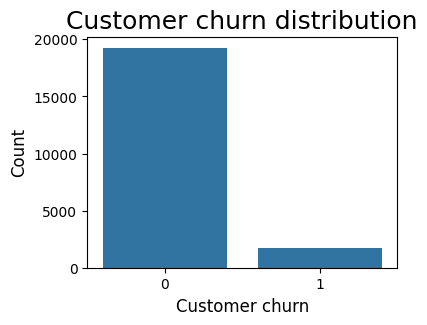

In [191]:
# Visualize churn distribution
plt.figure(figsize=(4, 3))
sns.countplot(x = high_val_train['churn_probability'])
plt.xlabel('Customer churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Customer churn distribution', fontsize=18)
plt.show()

The visualization clearly shows that 91.73% of customers are non-churn, while 8.26% have churned, highlighting a significant class imbalance that we will address in subsequent steps.

In [192]:
# Creating a copy of high_val_train DataFrame
churn_data = high_val_train.copy()
churn_data.reset_index(inplace=True)
churn_data.drop(['index'], axis=1, inplace=True)

In [193]:
## Missing value in the training set
mv = round(100*(churn_data.isnull().sum(axis=0)/churn_data.shape[0]), 2)
s = mv.loc[mv>0]
impute_cols_num = list(s.index)
len(impute_cols_num)

87

In [194]:
##Impute missing value using the KNN imputer
# Lets try to verify how many values are missing from the dataframe
drop = high_val_train.dropna()
print(churn_data.shape[0] - drop.shape[0])

12835


In [195]:
imputer = KNNImputer(n_neighbors=5)

In [196]:
# Separate df having columns to be imputed
df_num = churn_data[impute_cols_num]
churn_df = churn_data.drop(impute_cols_num, axis=1)

In [197]:
%%time
# Apply the imputer to your data (e.g., train data)
df_imp = imputer.fit_transform(df_num)

CPU times: user 40.3 s, sys: 11.5 s, total: 51.7 s
Wall time: 58.4 s


In [198]:
df_imp = pd.DataFrame(df_imp, columns=impute_cols_num)
df_imp.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0
1,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.8,1.0
2,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,0.0,0.0,0.0,1.0,1.0,1.0
3,93.18,38.29,29.86,531.19,507.76,222.03,0.00,0.0,0.0,0.00,0.0,0.0,93.18,38.29,29.86,159.29,219.44,99.86,0.00,0.00,0.00,0.0,0.00,0.36,252.48,257.74,129.73,0.0,0.0,0.0,371.89,288.31,121.79,0.0,0.0,0.00,371.89,288.31,121.79,0.0,0.0,0.0,0.00,0.00,0.36,0.0,0.0,0.0,52.49,37.84,19.14,170.61,106.71,150.73,0.00,1.53,1.13,223.11,146.09,171.01,0.0,0.0,0.0,6.96,9.54,21.93,0.00,0.00,0.0,6.96,9.54,21.93,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.58,11.48,12.68,133.16,158.73,182.83,0.00,0.0,0.0,0.00,0.0,0.0,8.58,11.48,12.68,96.91,149.44,157.23,33.71,9.28,25.59,0.0,0.00,0.00,139.21,170.21,195.51,0.0,0.0,0.0,2.53,0.00,0.00,0.0,0.0,0.00,2.53,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,51.74,83.83,82.81,129.01,214.49,159.69,87.28,67.69,107.94,268.04,366.03,350.46,0.0,0.0,0.4,0.00,0.00,0.00,15.43,0.00,0.0,15.43,0.00,0.40,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0


In [199]:
## Merge the data
final_df = pd.concat([df_imp, churn_df], join='inner', axis=1)
final_df.head()


,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_amt_6,total_amt_7,total_avg_amt_6_7
0,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.00,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,240.708,128.191,101.565,63.26,42.94,15.76,21.54,9.36,28.31,13,10,8,290,136,122,50,41,30,25,10,30,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0,0,0,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1515.0,1473.0,1494.0
1,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,6.26,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.0,0.0,0.00,0.00,0.00,0.00,1.03,0.0,0.00,1.03,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,1.0,0.8,1.0,580.549,377.294,338.286,327.64,366.79,391.53,233.18,777.39,629.94,5,3,4,654,400,652,250,250,250,0,150,250,154.0,0.0,154.0,1.0,0.0,1.0,0.0,0.0,0.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,0.00,0.00,164.75,0.00,28.80,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,808.0,400.0,604.0
2,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.00,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.0,0.0,207.03,0.00,0.00,0.00,0.00,0.0,207.03,0.00,0.00,0.13,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.4,0.0,0.0,0.0,1.0,1.0,1.0,1130.

In [200]:
final_df.shape

(20998, 149)

In [201]:
#Verify the missing value
final_df.isnull().sum().sort_values(ascending=False)

onnet_mou_6          0
total_ic_mou_7       0
total_rech_num_6     0
total_rech_num_7     0
total_rech_num_8     0
                    ..
loc_ic_t2t_mou_8     0
loc_ic_t2m_mou_6     0
loc_ic_t2m_mou_7     0
loc_ic_t2m_mou_8     0
total_avg_amt_6_7    0
Length: 149, dtype: int64

##  Test set

In [202]:
# Separate df having columns to be imputed
df_num_test = test[impute_cols_num]
churn_df_test = test.drop(impute_cols_num, axis=1)

In [203]:
%%time
# Apply the imputer to your data (e.g., train data)
df_imp_test = imputer.transform(df_num_test)

CPU times: user 1min 16s, sys: 18.4 s, total: 1min 35s
Wall time: 1min 38s


In [204]:
df_imp_test = pd.DataFrame(df_imp_test, columns=impute_cols_num)
df_imp_test.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1.0,1.0,1.0
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,0.2,0.0,0.0,1.0,1.0,1.0
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1.0,1.0,1.0
3,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.36,0.00,0.0,0.0,0.0,37.09,96.53,0.00,0.0,0.0,0.0,0.00,12.03,1.15,0.0,0.0,0.0,58.11,54.64,23.04,487.94,449.83,506.94,0.00,0.38,1.64,546.06,504.86,531.64,0.00,4.26,0.00,9.63,11.88,8.83,0.0,0.0,0.00,9.63,16.14,8.83,0.00,0.00,0.00,0.00,1.43,8.65,0.0,0.0,0.00,0.0,0.0,0.0,1.0,1.0,1.0
4,450.93,609.03,700.68,60.94,23.84,74.16,0.00,0.00,0.00,0.00,0.00,0.00,0.45,0.78,14.56,2.39,2.66,10.94,0.00,0.00,0.00,0.0,0.00,0.00,2.84,3.44,25.51,450.48,608.24,686.11,58.54,21.18,63.18,0.0,0.0,0.0,509.03,629.43,749.29,0.0,0.0,0.0,0.71,5.39,4.96,2.2,0.0,0.0,0.00,0.36,9.91,10.13,9.23,7.69,0.00,0.00,0.00,10.13,9.59,17.61,29.71,92.36,107.39,13.88,13.96,32.46,0.0,0.0,1.61,43.59,106.33,141.48,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.16,0.0,0.0,0.0,1.0,0.8,1.0


In [205]:
#Merge the data
final_test_df = pd.concat([df_imp_test, churn_df_test], join='inner', axis=1)
final_test_df.head()



,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,fb_user_6,fb_user_7,fb_user_8,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7
0,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.36,1.04,4.34,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1.0,1.0,1.0,69999,91.882,65.330,64.445,91.94,52.39,57.94,41.73,43.56,36.26,5,5,4,103,90,60,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00,103.0,90.0,96.5
1,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.00,12.51,0.00,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,0.2,0.0,0.0,1.0,1.0,1.0,70000,414.168,515.568,360.868,549.86,663.06,415.59,296.33,339.64,281.66,5,4,5,500,500,500,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,500.0,500.0,500.0
2,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,1.0,1.0,1.0,70001,329.844,434.884,746.239,0.00,0.00,0.00,0.00,0.00,0.

In [206]:
final_test_df.shape

(30000, 149)

In [207]:
#verify the missing value
final_test_df.isnull().sum().sort_values(ascending=False)

onnet_mou_6          0
total_ic_mou_6       0
total_ic_mou_8       0
total_rech_num_6     0
total_rech_num_7     0
                    ..
loc_ic_t2t_mou_8     0
loc_ic_t2m_mou_6     0
loc_ic_t2m_mou_7     0
loc_ic_t2m_mou_8     0
total_avg_amt_6_7    0
Length: 149, dtype: int64

In [208]:
final_test_df["total_amt_6"]

0         103.0
1         500.0
2         500.0
3         110.0
4         356.0
          ...  
29995     794.0
29996     317.0
29997     150.0
29998    1286.0
29999     316.0
Name: total_amt_6, Length: 30000, dtype: float64

## 3 Exploratory Data Analysis

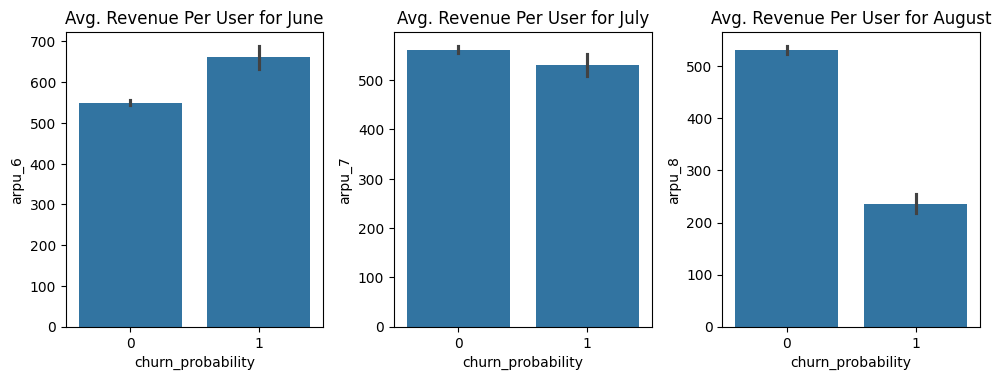

In [209]:
# Visualising Average Revenue per user
arpu_cols = ['arpu_6', 'arpu_7', 'arpu_8']
def plot_bar_graph(title, month, y_list, data):
 
    plt.figure(figsize=(10, 7))
    
    for i, m in enumerate(month):
        plt.subplot(2, 3, i+1)
        plt.title(f'{title} for {m}')
        sns.barplot(x='churn_probability', y=y_list[i], data=data)
    
    plt.tight_layout()
    plt.show()
plot_bar_graph('Avg. Revenue Per User', ['June', 'July', 'August'], arpu_cols, final_df)

The decline in Average Revenue Per User (ARPU) during the month of August indicates a potential churn trend.

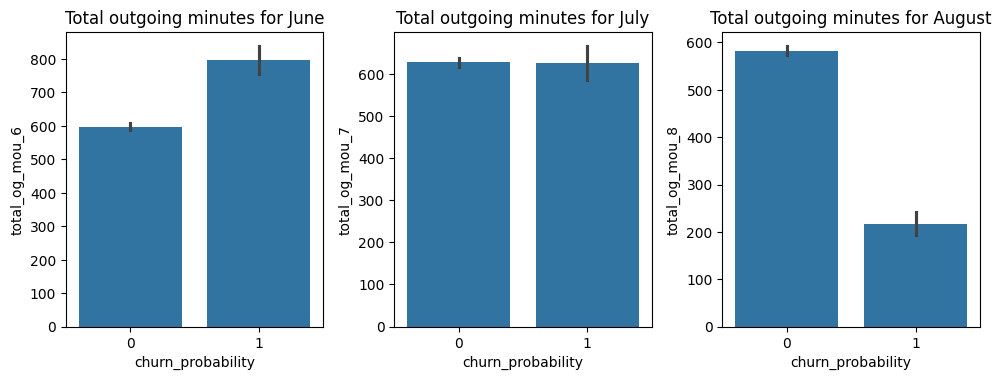

In [210]:
# Visualising Outgoing minutes of usage
total_og_mou_cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']
plot_bar_graph('Total outgoing minutes', ['June', 'July', 'August'], total_og_mou_cols, final_df)

The decrease in total outgoing minutes during the month of August suggests a potential churn trend.

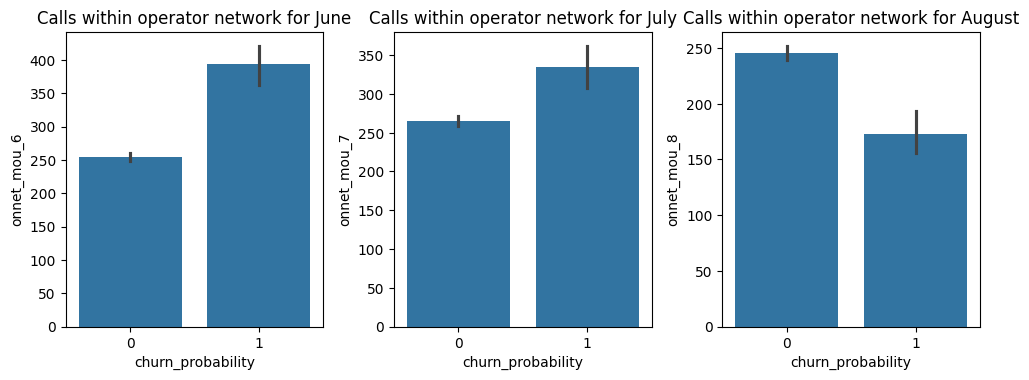

In [211]:
# Visualizing all types of calls within the operator's network
# .
def plot_bar_graph(title, month, y_list, data):
 
    plt.figure(figsize=(10, 7))
    
    for i, m in enumerate(month):
        plt.subplot(2, 3, i+1)
        plt.title(f'{title} for {m}')
        sns.barplot(x='churn_probability', y=y_list[i], data=data)
    
    plt.tight_layout()
    plt.show()
onnet_mou_cols = ['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8']
plot_bar_graph('Calls within operator network', ['June', 'July', 'August'], onnet_mou_cols, final_df)

The decline in calls within the operator network during the month of August suggests a potential churn trend

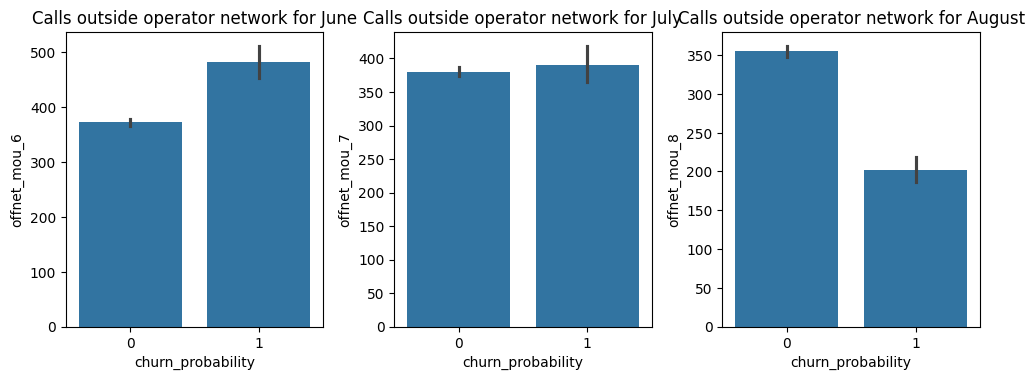

In [212]:
# Visualizing all types of calls made outside the operator network.
offnet_mou_cols = ['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8']
plot_bar_graph('Calls outside operator network', ['June', 'July', 'August'], offnet_mou_cols, final_df)

The decline in calls outside the operator network during the month of August suggests a potential churn trend.

# Correlation Matrices

In [213]:
# Analysing different metrics by extracting them into columns of similar type
amount_data = final_df.loc[:, final_df.columns.str.contains('amt')]
data2g = final_df.loc[:, final_df.columns.str.contains('2g')]
data3g = final_df.loc[:, final_df.columns.str.contains('3g')]
ic_mou_data = final_df.loc[:, final_df.columns.str.contains('ic') & final_df.columns.str.contains('mou')]
net_mou_data = final_df.loc[:, final_df.columns.str.contains('net_mou')]
og_mou_data = final_df.loc[:, final_df.columns.str.contains('og') & final_df.columns.str.contains('mou')]
rech_data = final_df.loc[:, final_df.columns.str.contains('rech')]
total_data = final_df.loc[:, final_df.columns.str.contains('tot')]

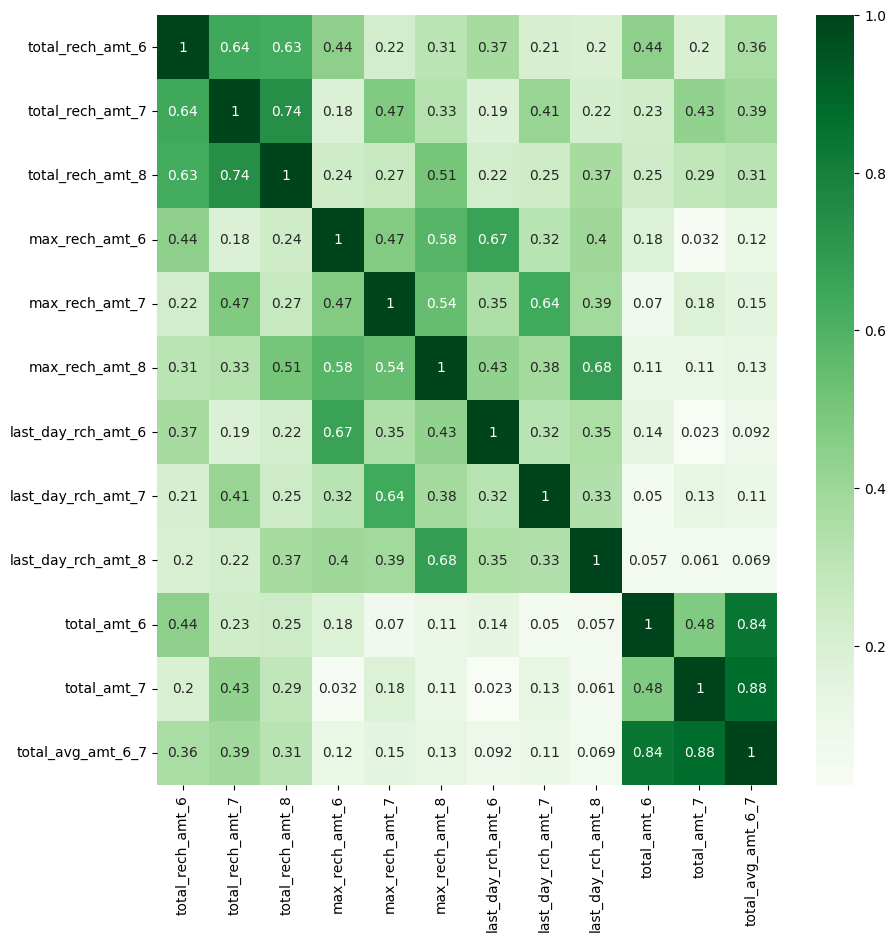

In [214]:
## Correlation for Amount Data
plt.figure(figsize=(10,10))
sns.heatmap(amount_data.corr(), annot=True, cmap='Greens')
plt.show()

A strong correlation of 74% is observed between the total recharge amount in month 7 and month 8. Additionally, a significant correlation of 68% exists between the maximum recharge amount in month 8 and the last day's recharge amount within the same month. These patterns suggest that customers who are less likely to churn tend to make higher recharge amounts in month 8.

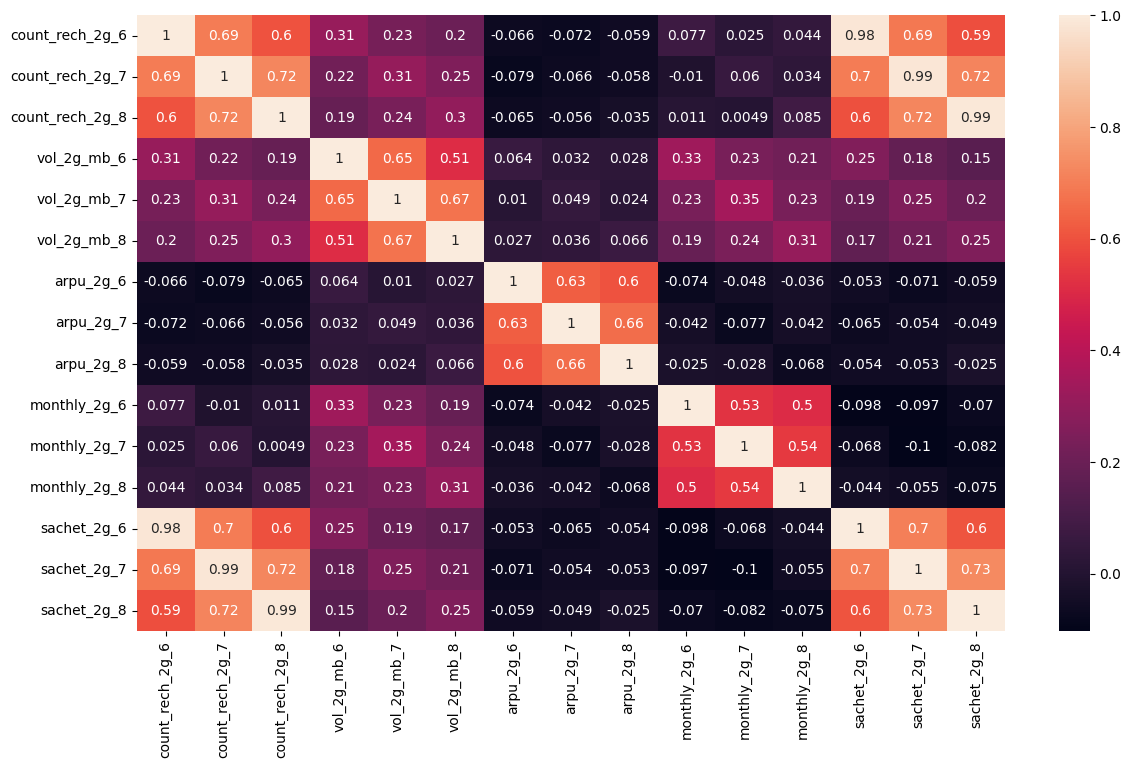

In [215]:
## Correlation for 2G data
plt.figure(figsize=(14,8))
sns.heatmap(data2g.corr(), annot=True)
plt.show()

## A strong correlation exists between the recharge amounts in months 7 and 8.

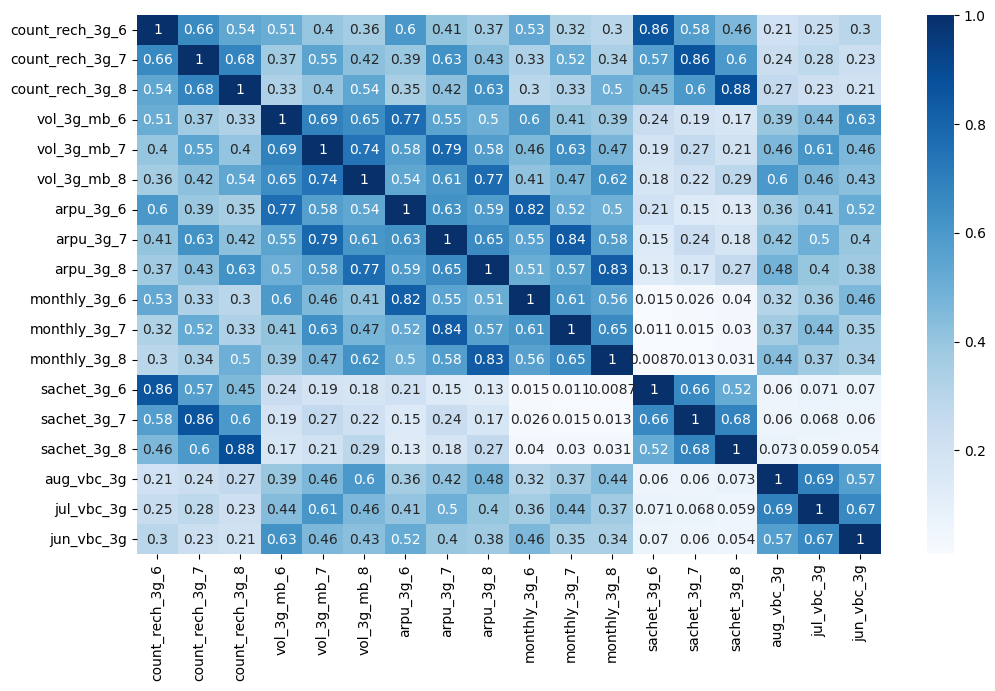

In [216]:
## Correlation Data 3G
plt.figure(figsize=(12,7))
sns.heatmap(data3g.corr(),annot=True, cmap='Blues')
plt.show()

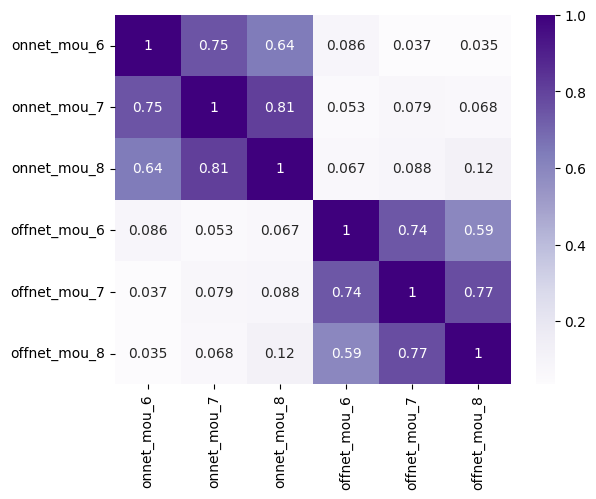

In [217]:
#correlation for net_mou_data
sns.heatmap(net_mou_data.corr(), annot=True, cmap='Purples')
plt.show()

There is no correlation between the usage minutes for on-net and off-net calls.

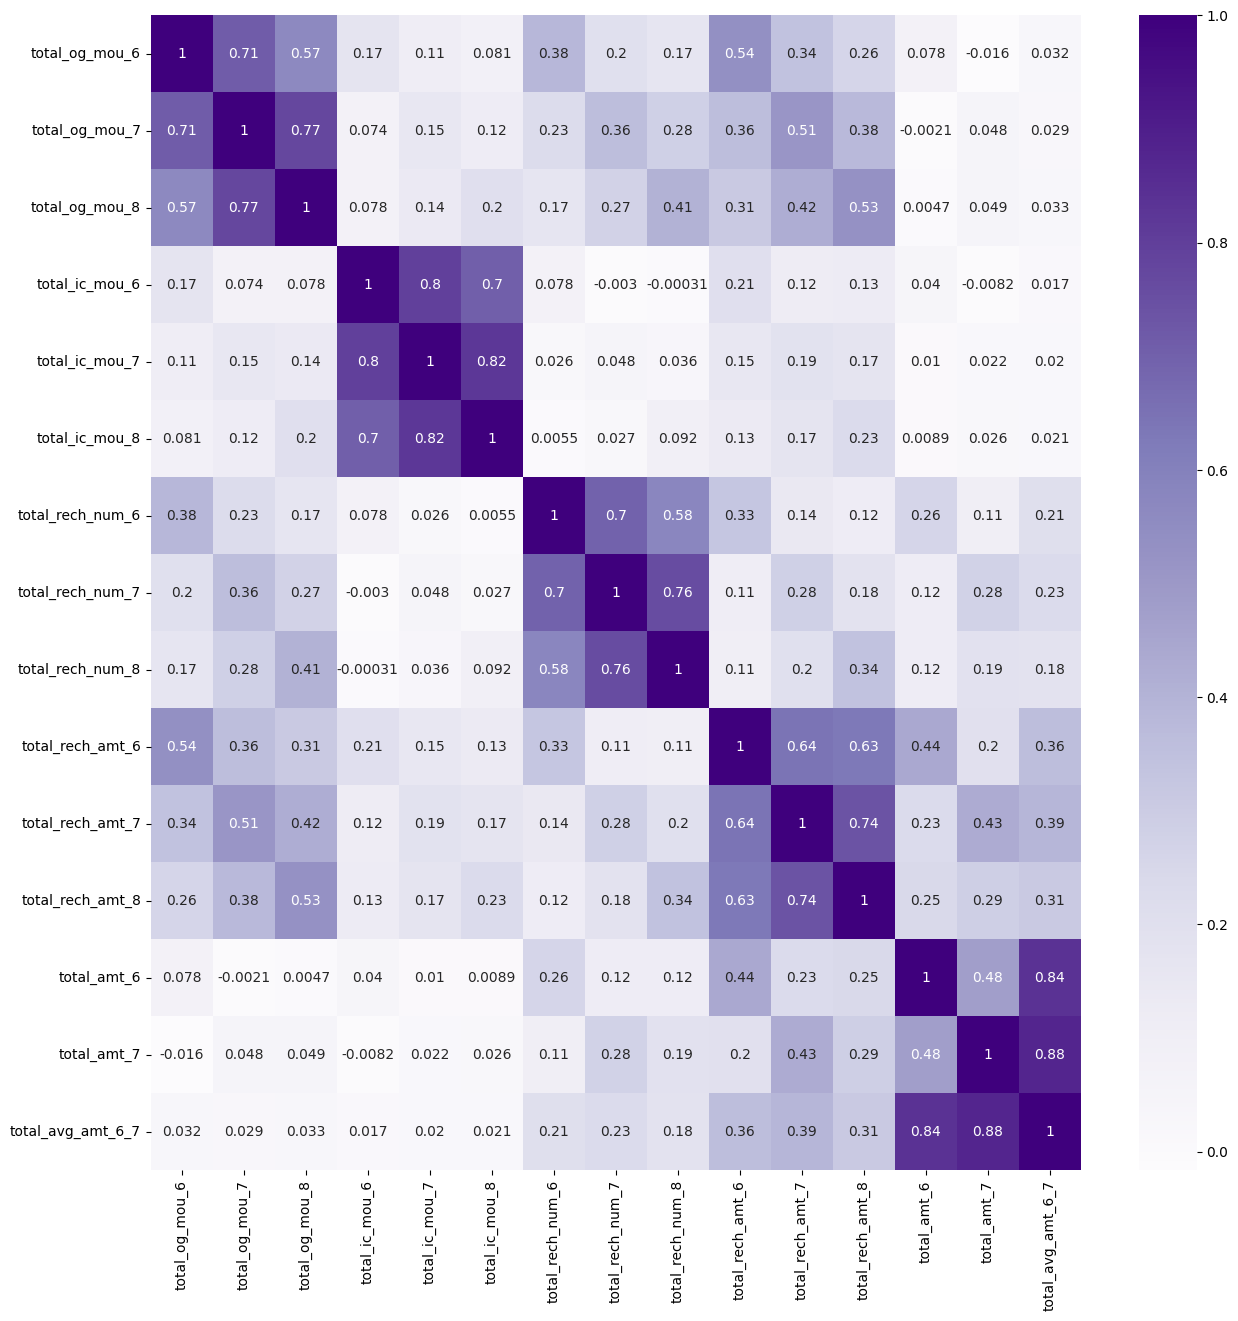

In [218]:
## Correlation for Total Data
#total_data
plt.figure(figsize=(15,15))
sns.heatmap(total_data.corr(), annot=True, cmap='Purples')
plt.show()

A notably high correlation is observed between the incoming (82%) and outgoing (77%) minutes of usage in months 7 and 8

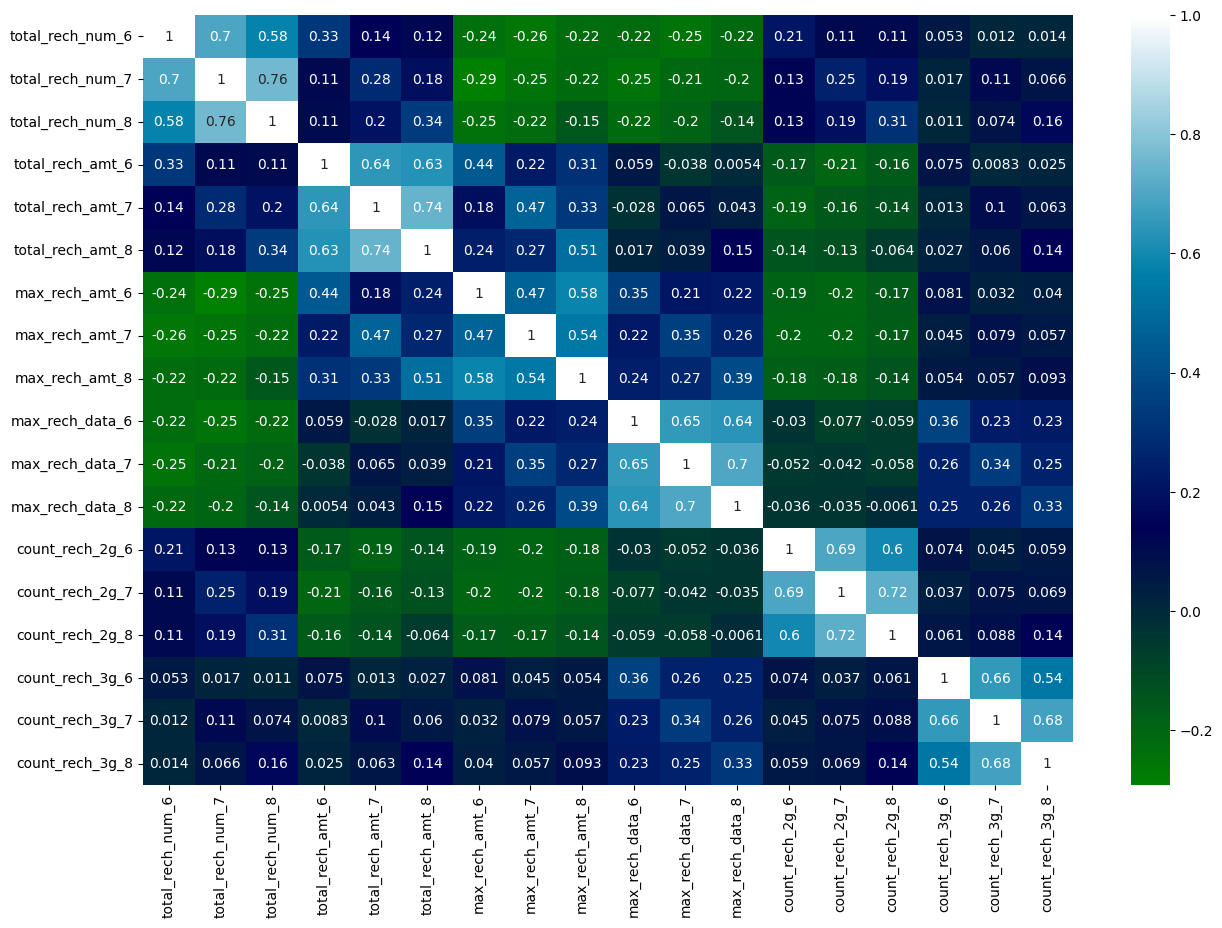

In [219]:
# correlation for rech_data
plt.figure(figsize=(15,10))
sns.heatmap(rech_data.corr(), annot=True, cmap='ocean')
plt.show()

A notable correlation exists between the average recharge amount and the recharge amounts for both months 6 and 7. Additionally, a strong correlation of 76% is observed between the total recharge amount in month 7 and the recharge amount in month 8. Any factor that is correlated with month 8 is likely to be indicative of churn prediction

In [220]:
## 4 Dummy variable for categorical column

In [221]:
dummy_df = pd.get_dummies(final_df[['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6']], drop_first=True, dtype='int')

In [222]:
final_df = pd.concat([final_df, dummy_df], axis=1)

In [223]:
# drop the categorical column
final_df.drop(['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1, inplace=True)

In [224]:
final_df.shape

(20998, 143)

In [225]:
## Test data
dummy_test_df = pd.get_dummies(final_test_df[['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6']], drop_first=True, dtype='int')

In [226]:
final_test_df = pd.concat([final_test_df, dummy_test_df], axis=1)

In [227]:
# drop the categorical column
final_test_df.drop(['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1, inplace=True)

In [228]:
final_test_df.shape
final_df.shape

(20998, 143)

In [229]:

# test_data_set = pd.read_csv('test.csv')
# test_data_set.head()
# test_data_set.shape
# test_data_set.drop(cols_with_single_value, axis=1, inplace=True)
# test_data_set.isnull().sum().sort_values(ascending=False)

# test_data_set.drop(columns=columns_by_type["date"], axis=1, inplace=True)
# test_data_set[recharge_cols] = test_data_set[recharge_cols].fillna(0)

# print("arpur cols")
# test_data_set[arpu_cols] = test_data_set[arpu_cols].fillna(0)
# print(test_data_set[arpu_cols].isnull().sum()*100/test_data_set.shape[1])

# print("Categorical columns")
# test_data_set[cat_cols] = test_data_set[cat_cols].fillna(-1).astype('category')
# print(test_data_set[cat_cols].isnull().sum()*100/test_data_set.shape[1])


# # Deriving new columns for Total Data Recharge Amount for the 'Good Phase' in the test set
# test_data_set['total_rech_data_amt_6'] = test_data_set['total_rech_data_6'] * test_data_set['av_rech_amt_data_6']
# test_data_set['total_rech_data_amt_7'] = test_data_set['total_rech_data_7'] * test_data_set['av_rech_amt_data_7']

# test_data_set['total_amt_6'] = test_data_set['total_rech_data_amt_6'] + test_data_set['total_rech_amt_6']
# test_data_set['total_amt_7'] = test_data_set['total_rech_data_amt_7'] + test_data_set['total_rech_amt_7']

# test_data_set['total_avg_amt_6_7'] = test_data_set[['total_amt_6', 'total_amt_7']].mean(axis=1)

# # Dropping the drop_data_cols from the test set
# test_data_set.drop(drop_data_cols, axis=1, inplace=True)

# df_num_unseen = test_data_set[impute_cols_num]
# churn_df_unseen = test_data_set.drop(impute_cols_num, axis=1)
# df_imp_unseen = imputer.transform(df_num_unseen)

# df_imp_unseen = pd.DataFrame(df_imp_unseen, columns=impute_cols_num)
# df_imp_unseen.head()

# final_unseen_df = pd.concat([df_imp_unseen, churn_df_unseen], join='inner', axis=1)
# final_unseen_df.head()


# # apply the same logic on test set


# # Creating dummies for categorical columns
# dummy_unseen_df = pd.get_dummies(final_unseen_df[['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6']], drop_first=True, dtype='int')
# final_unseen_df = pd.concat([final_unseen_df, dummy_unseen_df], axis=1)


# final_unseen_df.drop(['night_pck_user_8', 'fb_user_8', 'fb_user_7', 'fb_user_6', 'night_pck_user_7', 'night_pck_user_6'], axis=1, inplace=True)

# final_unseen_df.info()

# final_unseen_df.shape

## 6 Outlier Treatment

In [230]:
def outlier_handling(dataframe):
    transformed_values = []
    for value in dataframe:
        if value <= 0:
            transformed_values.append(float(0))
        elif float(value) == float(1.0):
            transformed_values.append(float(1.5))
        else:
            transformed_values.append(float(np.log1p(value)))

    return transformed_values

In [231]:
numerical_cols = list(final_df.select_dtypes(exclude='category'))
numerical_cols

['onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'spl_og_mou_6',
 'spl_og_mou_7',
 'spl_og_mou_8',
 'og_others_6',
 'og_others_7',
 'og_others_8',
 'loc_ic_t2t_mou_6',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou

In [232]:
# Handle outliers of numerical columns in the training set

final_df[numerical_cols] = final_df[numerical_cols].apply(outlier_handling)
final_df.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7
count,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000,20998.000000
mean,4.198149,4.180897,3.977873,5.088423,5.063243,4.846316,0.713114,0.551664,0.568697,0.836199,0.662081,0.663646,3.070226

In [233]:
## test data
def outlier_handling_df(df):
    for col in df.columns:
        df[col] = outlier_handling(df[col])
    return df

final_test_df[numerical_cols] = final_test_df[numerical_cols].apply(outlier_handling)
final_test_df.describe(percentiles=[.25, .50, .75, .90, .95, .99])
final_test_df.shape

(30000, 143)

In [234]:
## 7 Model Building & Evaluation 

In [235]:
X = final_df.drop(['churn_probability'], axis=1)
y = final_df['churn_probability']

In [236]:
print(X.shape)
print()
X.head()

(20998, 142)



,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7
0,3.103689,1.763017,1.964311,4.060271,3.666378,2.363680,4.000766,0.0,0.0,2.817204,0.0,0.0,2.412336,1.763017,1.964311,3.630721,3.038792,1.724551,2.564180,0.802002,1.793425,0.0,2.384165,0.000000,4.092843,3.293612,2.818995,0.0,0.0,0.0,1.677097,0.000000,0.000000,0.0,0.0,0.00000,1.677097,0.000000,0.000000,0.0,0.0,0.0,0.000000,2.890372,0.000000,0.00000,0.0,0.0,1.862529,0.871293,1.297463,2.449279,1.673351,3.019937,1.873339,1.532557,1.965713,3.115292,2.337952,3.377929,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.487730,4.861292,4.630497,4.162937,3.782825,2.818995,3.115292,2.337952,3.377929,2.639057,2.397895,2.197225,5.673323,4.919981,4.812184,3.931826,3.737670,3.433987,3.258097,2.397895,3.433987,3.258097,3.737670,3.258097,2.079442,1.945910,1.94591,0.0,1.5,0.000000,5.970752,5.736217,5.368170,0.000000,0.000000,0.000000,0.000000,3.583519,0.000000,0.000000,3.586847,0.000000,0.0,0.0,0.0,2.079442,1.945910,1.94591,0.0,0.0,0.0,0.0,1.5,0.0,6.473891,0.000000,0.000000,0.000000,7.323831,7.295735,7.309881
1,2.436241,3.257712,5.275202,5.762397,5.837118,5.288721,0.000000,0.0,0.0,0.000000,0.0,0.0,2.436241,3.257712,5.275202,5.751810,5.804773,5.230467,1.449269,2.477378,1.781709,0.0,0.000000,0.000000,5.794415,5.907512,5.956511,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,1.98238,0.000000,0.000000,1.982380,0.0,0.0,0.0,0.076961,0.000000,0.000000,0.09531,0.0,0.0,2.698673,3.053057,5.818390,5.395036,6.627036,5.658192,0.000000,1.075002,2.290513,5.456090,6.655904,6.447211,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.708036,0.0,0.000000,0.708036,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,6.365695,5.935672,5.826843,5.794963,5.907512,5.972613,5.456090,6.657228,6.447211,1.791759,1.386294,1.609438,6.484635,5.993961,6.481577,5.525453,5.525453,5.525453,0.000000,5.017280,5.525453,5.043425,0.000000,5.043425,1.500000,0.000000,1.50000,0.0,0.0,0.000000,5.56

In [237]:
print(y.shape)
y.head()

(20998,)


0    0
1    0
2    0
3    0
4    0
Name: churn_probability, dtype: category
Categories (2, int64): [0, 1]

In [238]:
# outlier treatment on test_set

# Handle outliers of numerical columns in the test set
# final_unseen_df[numerical_cols] = final_unseen_df[numerical_cols].apply(outlier_handling)
# Inspecting the numerical columns again in the test set
# final_unseen_df.describe(percentiles=[.25, .50, .75, .90, .95, .99])

In [239]:
# Train test split - 80% training data, 20% validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [240]:
# shape after split
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (16798, 142)
y_train Shape: (16798,)
X_test Shape: (4200, 142)
y_test Shape: (4200,)


In [241]:
y_train.value_counts()

churn_probability
0    15400
1     1398
Name: count, dtype: int64

## Feature Scaling using SandardScaler - Training Set

In [242]:
smt = SMOTE(random_state=2)
X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

In [243]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(30800, 142)
(30800,)


In [244]:
# Use SandardScaler to scale values
scaler = StandardScaler()

# Fit and transform training set
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_smote), columns = X_train_smote.columns, index = X_train_smote.index)

# Only Transform validation set
#X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns, index = X_test.index)

In [245]:
X_train_scaled.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7
0,0.167309,0.105372,0.650564,-0.116834,-0.110913,0.292403,2.464902,-0.509964,2.371101,2.195972,-0.553377,2.192414,0.289247,0.551035,0.509538,-0.201791,0.341027,0.205377,-0.519627,0.041602,-0.658676,2.651559,-0.425242,-0.554589,-0.078496,0.341407,0.273891,0.015446,0.377494,0.793583,0.057489,0.269369,0.334320,-0.326912,-0.326365,-0.321942,-0.070971,0.199546,0.469326,-0.249733,-0.239673,-0.215567,1.122079,-0.865339,-0.894078,-0.547606,-0.059819,-0.065474,0.473439,0.065820,0.498192,0.262061,0.572343,0.227426,1.190415,1.778914,1.521208,0.304941,0.527007,0.390956,-0.271238,-0.888490,-0.087514,1.112035,1.187662,1.186127,-0.431413,-0.432473,-0.410629,0.771395,0.821381,0.874121,-0.48289,-0.222774,-0.248276,1.186980,-0.487399,-0.500369,-0.399605,1.195384,-0.359723,0.133590,-0.817709,0.840626,-0.264939,0.085534,0.416672,0.357644,0.526807,0.572258,-1.011408,-1.434732,-0.620136,0.792995,-3.651001,0.423293,2.102542,-3.458816,0.942130,-2.288476,-1.712635,1.480129,1.433670,-0.911059,1.829198,1.197169,-0.720795,1.563315,-0.56308,-0.514816,-0.419359,-0.298449,-0.728085,0.728321,1.188151,-0.626225,1.482908,-0.617603,-0.576053,1.816962,0.109081,-0.642945,-0.412623,3.015975,-0.361859,3.483209,-0.613351,-0.593435,-0.496605,-0.42888,-0.390813,-0.333265,-0.354465,-0.330192,-0.252372,1.083735,1.462227,0.668788,1.075275,0.596259,-3.764141,-0.265083
1,0.007939,0.106544,0.267054,-0.153165,-0.369584,0.167385,0.974348,-0.509964,1.492638,1.533236,-0.553377,0.694790,0.136776,0.797631,0.810485,0.268626,0.071061,0.475489,2.086315,0.972882,0.605821,-0.515563,-0.547804,2.458187,0.280330,0.328645,0.543595,0.298694,-0.004916,0.273930,-0.281384,0.109904,0.250607,-0.326912,-0.326365,3.653520,-0.060917,-0.035739,0.256297,-0.249733,-0.239673,1.000933,-0.901333,-0.945279,1.606097,-0.547606,-0.059819,-0.065474,0.039707,0.171135,0.588441,-0.178949,-0.272387,0.282093,1.263456,0.543397,0.519875,-0.038820,-0.144776,0.345138,1.354973,0.866865,0.694239,1.278434,0.232571,0.530795,2.552076,

In [246]:
final_test_df.head()

,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,id,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7
0,3.489819,3.055415,3.182627,4.113493,3.501344,3.578786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.253470,3.055415,3.093766,2.951258,2.475698,2.236445,0.000000,2.679651,0.00000,0.0,0.000000,0.029559,3.784417,3.822317,3.415429,2.066863,0.000000,1.115142,3.761898,2.161022,3.311637,0.0,0.0,0.0,3.910622,2.161022,3.383712,0.0,0.0,0.000000,0.000000,0.000000,0.029559,0.000000,0.0,0.0,3.444576,3.652215,3.134624,2.416806,1.720979,2.354228,0.231112,0.000000,0.000000,3.733136,3.764914,3.481548,0.000000,0.000000,0.000000,0.307485,0.712950,1.675226,0.0,0.0,0.00000,0.307485,0.712950,1.675226,0.431782,0.29267,0.329304,0.000000,0.000000,0.000000,0.0,0.0,0.00000,69999,4.531330,4.194642,4.181210,4.531954,3.977623,4.076520,3.754901,3.796837,3.617920,1.791759,1.791759,1.609438,4.644391,4.510860,4.110874,3.931826,3.433987,3.433987,3.433987,3.433987,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.434257,0.00000,0.000000,0.000000,4.644391,4.510860,4.579852
1,4.337421,3.742657,3.036874,6.164030,6.434290,5.981263,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.337421,3.742657,3.036874,6.162493,6.395395,5.935582,0.548121,0.000000,0.00000,0.0,0.000000,0.000000,6.311481,6.461921,5.986728,0.000000,0.000000,0.000000,0.000000,3.209229,2.927453,0.0,0.0,0.0,0.000000,3.209229,2.927453,0.0,0.0,0.587787,0.000000,0.000000,0.000000,0.000000,0.0,0.0,3.044046,3.330417,1.283708,5.082584,4.814539,5.224725,0.912283,0.000000,0.000000,5.207791,5.012234,5.238727,0.000000,0.000000,0.000000,0.000000,2.603430,0.000000,0.0,0.0,0.00000,0.000000,2.603430,0.000000,0.000000,0.00000,0.000000,4.750395,5.186715,4.556295,0.0,0.0,0.00000,70000,6.028683,6.247207,5.891280,6.311481,6.498373,6.032103,5.694843,5.830826,5.644245,1.791759,1.609438,1.791759,6.216606,6.216606,6.216606,5.525453,5.525453,5.525453,5.525453,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [247]:
final_test_df.set_index('id', inplace=True)

In [248]:
%%time
# Select top 20 features using RFE
logreg = LogisticRegression(max_iter=1000, tol=0.001, solver='sag')
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train_scaled, y_train_smote)



CPU times: user 3min 9s, sys: 1.58 s, total: 3min 11s
Wall time: 3min 31s


In [306]:
print(list(zip(X_train_scaled.columns, rfe.support_, rfe.ranking_)))
# Selected features using RFE
selected_features = X_train_scaled.columns[rfe.support_]
print(selected_features)
X_train_scaled_final = X_train_scaled[selected_features]
logreg.fit(X_train_scaled_final, y_train_smote)
y_train_smote_pred = logreg.predict(X_train_scaled_final)


[('onnet_mou_6', np.False_, np.int64(68)), ('onnet_mou_7', np.False_, np.int64(11)), ('onnet_mou_8', np.True_, np.int64(1)), ('offnet_mou_6', np.False_, np.int64(84)), ('offnet_mou_7', np.False_, np.int64(26)), ('offnet_mou_8', np.False_, np.int64(25)), ('roam_ic_mou_6', np.False_, np.int64(67)), ('roam_ic_mou_7', np.False_, np.int64(27)), ('roam_ic_mou_8', np.True_, np.int64(1)), ('roam_og_mou_6', np.False_, np.int64(66)), ('roam_og_mou_7', np.False_, np.int64(22)), ('roam_og_mou_8', np.True_, np.int64(1)), ('loc_og_t2t_mou_6', np.False_, np.int64(82)), ('loc_og_t2t_mou_7', np.False_, np.int64(80)), ('loc_og_t2t_mou_8', np.False_, np.int64(44)), ('loc_og_t2m_mou_6', np.False_, np.int64(61)), ('loc_og_t2m_mou_7', np.False_, np.int64(121)), ('loc_og_t2m_mou_8', np.False_, np.int64(116)), ('loc_og_t2f_mou_6', np.False_, np.int64(100)), ('loc_og_t2f_mou_7', np.False_, np.int64(54)), ('loc_og_t2f_mou_8', np.False_, np.int64(53)), ('loc_og_t2c_mou_6', np.False_, np.int64(48)), ('loc_og_t2c_

## Model 1. Logistic Regression with PCA and Hyperparameter Tuning

In [251]:
pca = PCA()

In [252]:
pca_components = pca.fit_transform(X_train)
pca_components

array([[ 5.86382598e-01,  2.76347877e+00,  3.64989792e+00, ...,
         4.67816270e-03, -1.84549499e-02, -2.13780733e-02],
       [ 6.28785929e+00, -4.50431069e+00, -1.23194861e+00, ...,
         8.85302746e-02,  3.88340310e-03, -2.17804868e-02],
       [ 1.18095594e+01, -4.15862598e+00,  2.44280618e+00, ...,
        -9.94015086e-03,  4.53081567e-03,  2.18797719e-02],
       ...,
       [-3.86461665e+00,  3.87713213e+00, -1.82695004e-01, ...,
        -1.68350059e-02, -5.86092085e-03, -2.27867131e-02],
       [-1.21602484e+01, -8.06845299e-01, -1.78872155e+00, ...,
         1.18719914e-02, -1.26285011e-02, -2.08761413e-02],
       [-2.52644509e+01, -5.02786726e+00,  6.72806393e+00, ...,
        -3.68094041e-02,  3.52628245e-03,  5.08605703e-02]],
      shape=(16798, 142))

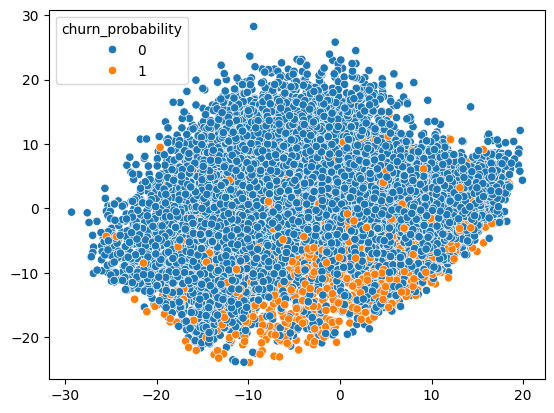

In [253]:
sns.scatterplot(x=pca_components[:,0], y=pca_components[:,1], hue=y_train)
plt.show()

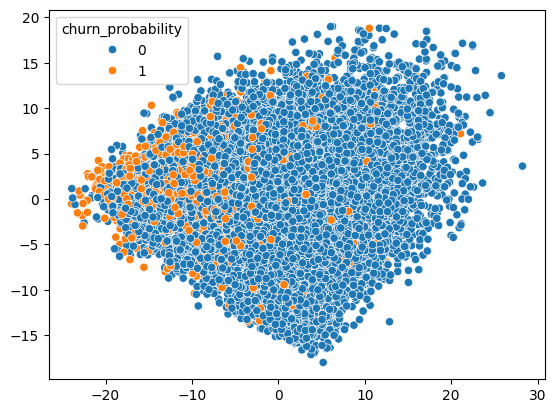

In [254]:
sns.scatterplot(x=pca_components[:,1], y=pca_components[:,2], hue=y_train)
plt.show()

In [255]:
X = high_val_train.copy().drop(['churn_probability'], axis=1)
y = high_val_train.copy()['churn_probability']

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [257]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
scaler = StandardScaler()
pca = PCA(n_components=20)
smote = SMOTE(random_state=2)
lr = LogisticRegression(max_iter=1000, tol=0.001, random_state=42)
rfe = RFE(lr, n_features_to_select=20)
rfe = rfe.fit(X_train_scaled, y_train_smote)

In [258]:
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    lr
)

In [259]:
# Instantiate GridSearchCV
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'logisticregression__solver': ['liblinear', 'saga'],
}
lr_grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [260]:
# Fit the model using GridSearchCV
lr_grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
lr_best_params = lr_grid_search.best_params_
lr_best_estimator = lr_grid_search.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [261]:
# Predict values on the training set
y_train_pred = lr_grid_search.predict(X_train)
# Predict values on the test set
y_test_pred = lr_grid_search.predict(X_test)


In [262]:
def calculate_classification_metrics(y_true, y_pred):
    """
    Calculate various classification metrics.

    Parameters:
    y_true (array-like): True labels.
    y_pred (array-like): Predicted labels.

    Returns:
    pd.DataFrame: A DataFrame containing the calculated metrics.
    """
    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    print('Confusion Matrix')
    print()
    print(cm)
    
    # True Positives, False Positives, True Negatives, False Negatives
    TP = cm[1, 1]
    FP = cm[0, 1]
    TN = cm[0, 0]
    FN = cm[1, 0]

    # Accuracy Score
    accuracy = round((TP + TN) / (TP + FP + TN + FN), 4)

    # Sensitivity (Recall or True Positive Rate)
    sensitivity = round(TP / (TP + FN), 4)

    # Specificity
    specificity = round(TN / (TN + FP), 4)

    # Precision
    precision = round(TP / (TP + FP), 4)

    # False Positive Rate
    false_positive_rate = round(FP / (FP + TN), 4)

    # True Positive Rate
    true_positive_rate = sensitivity

    metrics_df = pd.DataFrame({
        'Metric': ['Accuracy', 'Sensitivity', 'Specificity', 'Precision', 'False Positive Rate', 'True Positive Rate'],
        'Value': [accuracy, sensitivity, specificity, precision, false_positive_rate, true_positive_rate]
    })

    return metrics_df

In [263]:
# Metrics of the training set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[12517  2883]
 [  268  1130]]


,Metric,Value
0,Accuracy,0.8124
1,Sensitivity,0.8083
2,Specificity,0.8128
3,Precision,0.2816
4,False Positive Rate,0.1872
5,True Positive Rate,0.8083


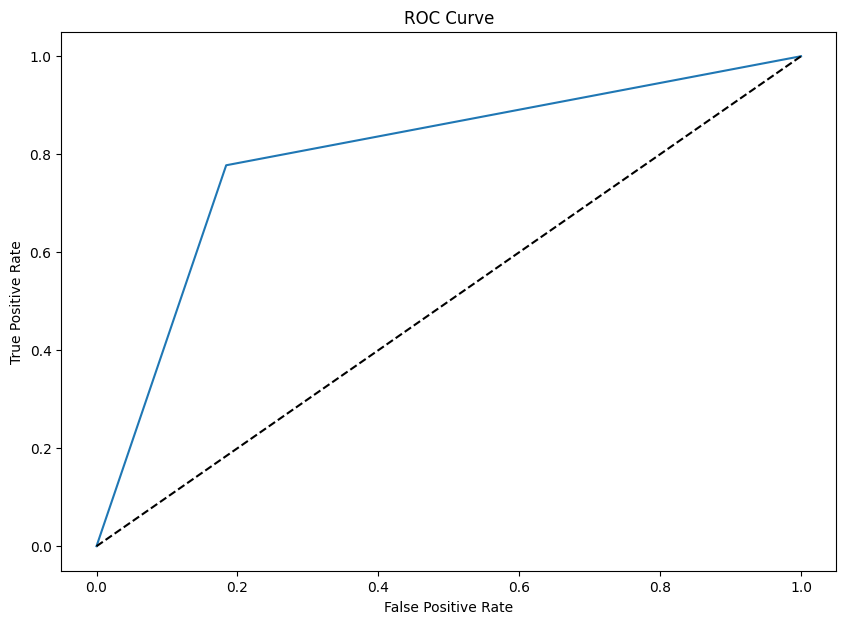

In [264]:
# ROC curve
#immlpment function

y_val = y_test
y_val_pred = y_test_pred
# implement function draw_roc
def draw_roc(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    # plot the roc curve
    plt.figure(figsize=(10, 7))
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()
    return fpr, tpr, thresholds
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)



## Model 2. Decision Tree with PCA and GridSearchCV

In [265]:
dt = DecisionTreeClassifier(random_state=42)

In [266]:
params = {
    'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
    'decisiontreeclassifier__min_samples_leaf': [5, 10, 20, 50, 100],
}

In [267]:
imputer = SimpleImputer(strategy='constant', fill_value=0)
scaler = StandardScaler()
pca = PCA(n_components=25)
smote = SMOTE(random_state=2)

In [268]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    dt
)

In [269]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=pipe, 
                           param_grid=params, 
                           cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [270]:
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(fill_value=0,
                                                      strategy='constant')),
                                       ('smote', SMOTE(random_state=2)),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=25)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': [2, 3, 5, 10, 20],
                         'decisiontreeclassifier__min_samples_leaf': [5, 10, 20,
                                                                      50,
                                                                      100]},
             scoring='accuracy', verbose=1)

In [271]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Predict on train set using the best model
y_train_pred = grid_search.predict(X_train)

# Predict on test set using the best model
y_test_pred = grid_search.predict(X_test)

In [272]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[12954  2446]
 [  610   788]]


,Metric,Value
0,Accuracy,0.8181
1,Sensitivity,0.5637
2,Specificity,0.8412
3,Precision,0.2437
4,False Positive Rate,0.1588
5,True Positive Rate,0.5637


In [273]:
# Metrics on the test set
calculate_classification_metrics(y_test, y_test_pred)

Confusion Matrix

[[3204  659]
 [ 143  194]]


,Metric,Value
0,Accuracy,0.8090
1,Sensitivity,0.5757
2,Specificity,0.8294
3,Precision,0.2274
4,False Positive Rate,0.1706
5,True Positive Rate,0.5757


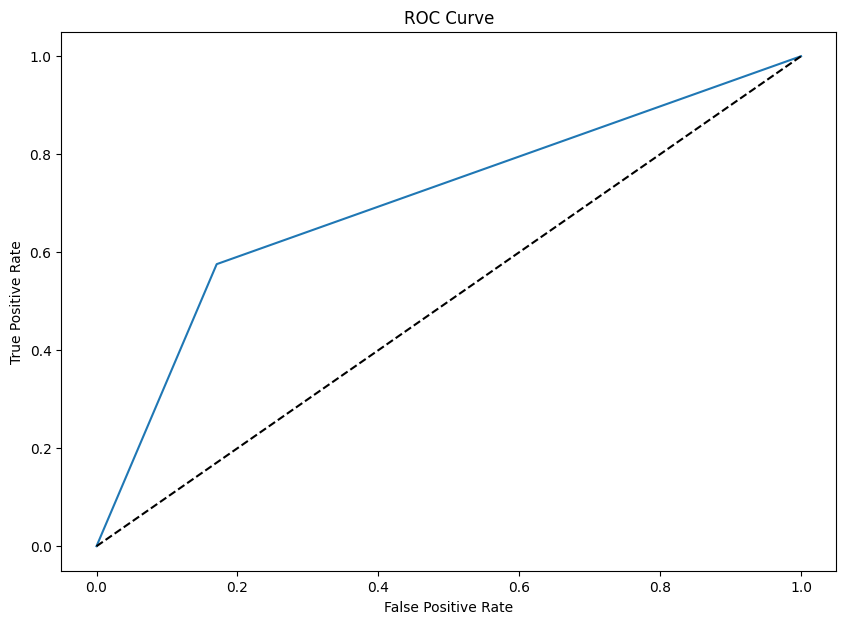

In [274]:
# ROC curve

y_val_pred = y_test_pred
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

## Model 3 Random Forest Classifier with PCA and Hyperparameter Tuning

In [275]:
rf = RandomForestClassifier(random_state=42)

In [276]:
param_grid = {
    'randomforestclassifier__n_estimators': [100],  
    'randomforestclassifier__max_depth': [5, 10],       
    'randomforestclassifier__min_samples_split': [2, 5, 10],
}

In [277]:
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    rf
)

In [278]:
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [279]:
%%time
# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


CPU times: user 9.43 s, sys: 688 ms, total: 10.1 s
Wall time: 47 s


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(fill_value=0,
                                                      strategy='constant')),
                                       ('smote', SMOTE(random_state=2)),
                                       ('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=25)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [5, 10],
                         'randomforestclassifier__min_samples_split': [2, 5,
                                                                       10],
                         'randomforestclassifier__n_estimators': [100]},
             scoring='accuracy', verbose=1)

In [280]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on train set using the best model
y_train_pred = best_model.predict(X_train)

# Predict on train set using the test model
y_test_pred = best_model.predict(X_test)

Best Parameters: {'randomforestclassifier__max_depth': 10, 'randomforestclassifier__min_samples_split': 10, 'randomforestclassifier__n_estimators': 100}


In [281]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[13943  1457]
 [   90  1308]]


,Metric,Value
0,Accuracy,0.9079
1,Sensitivity,0.9356
2,Specificity,0.9054
3,Precision,0.4731
4,False Positive Rate,0.0946
5,True Positive Rate,0.9356


In [282]:
# Metrics on the test set
calculate_classification_metrics(y_val, y_test_pred)

Confusion Matrix

[[3379  484]
 [  94  243]]


,Metric,Value
0,Accuracy,0.8624
1,Sensitivity,0.7211
2,Specificity,0.8747
3,Precision,0.3343
4,False Positive Rate,0.1253
5,True Positive Rate,0.7211


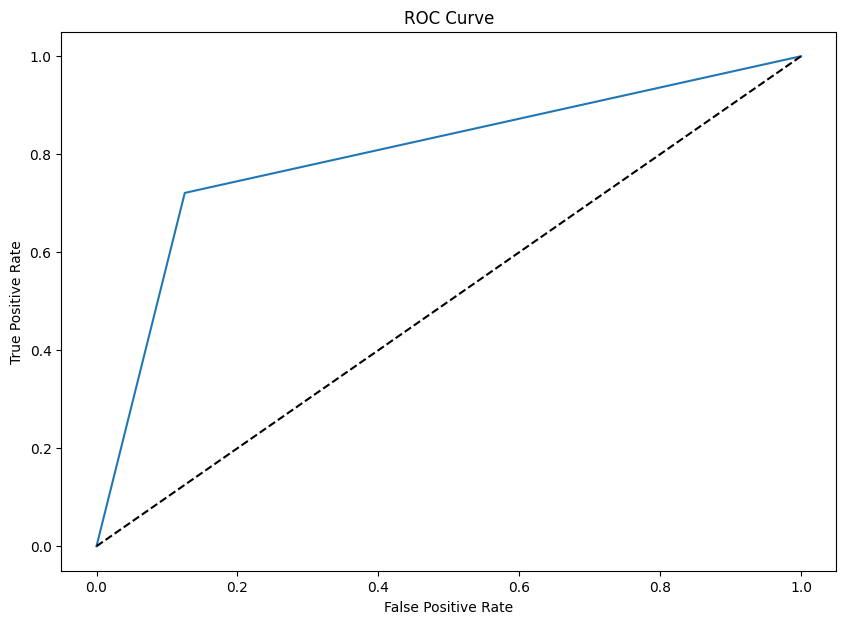

In [283]:
# ROC curve
y_val_pred = y_test_pred
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

## Model 4 AdaBoost Classifier

In [284]:
# Create a pipeline
pipe = make_pipeline(
    imputer,
    smote,
    scaler,
    pca,
    AdaBoostClassifier(n_estimators=200, random_state=42)
)

In [285]:
# Build the model
adaboost_model = pipe.fit(X_train, y_train)

In [286]:
# Predict on train set using the best model
y_train_pred = adaboost_model.predict(X_train)

# Predict on train set using the validation model
y_test_pred = adaboost_model.predict(X_test)

In [287]:
# Metrics on the train set
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[13008  2392]
 [  265  1133]]


,Metric,Value
0,Accuracy,0.8418
1,Sensitivity,0.8104
2,Specificity,0.8447
3,Precision,0.3214
4,False Positive Rate,0.1553
5,True Positive Rate,0.8104


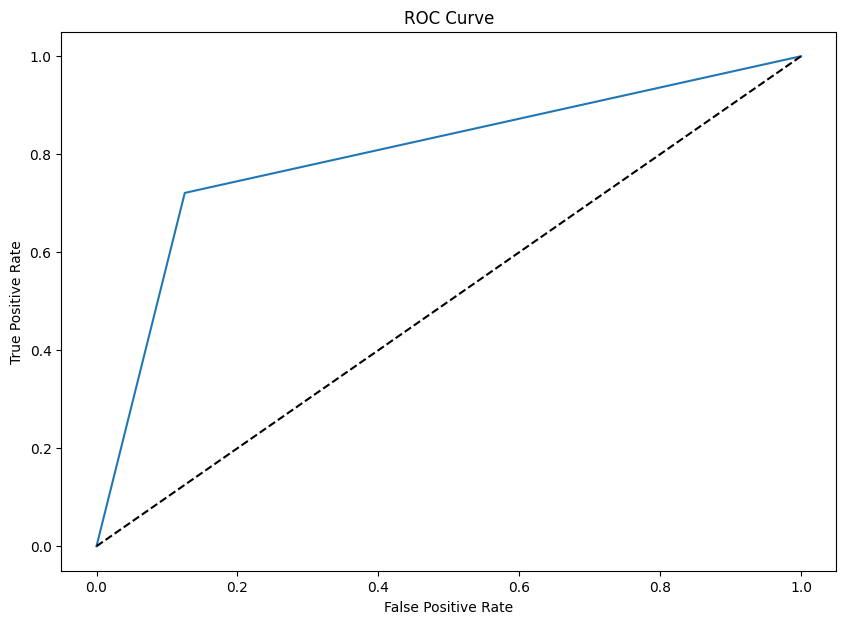

In [288]:
# ROC curve
fpr, tpr, thresholds = draw_roc(y_val, y_val_pred)

# Model 5 XGBoost Classifier


In [289]:
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from imblearn.pipeline import Pipeline

In [290]:
xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42
)
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
    ('smote', SMOTE(random_state=2)),
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=20)),
    ('xgb', XGBClassifier(
        learning_rate=0.1,
        n_estimators=100,
        max_depth=5,
        min_child_weight=1,
        gamma=0,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='binary:logistic',
        random_state=42
    ))
])
xgb_model = pipe.fit(X_train, y_train)
y_train_pred = xgb_model.predict(X_train)
# y_test_pred = xgb_model.predict(X_test)
# Metrics on the train set
# calculate_classification_metrics(y_train, y_train_pred)
# Metrics on the test set
# calculate_classification_metrics(y_val, y_test_pred)
# ROC curve
# fpr, tpr, thresholds = draw_roc(y_val, y_test_pred)

Training Metrics:
Confusion Matrix

[[13664  1736]
 [ 1161 14239]]

Test Metrics:
Confusion Matrix

[[3339  524]
 [  86  251]]


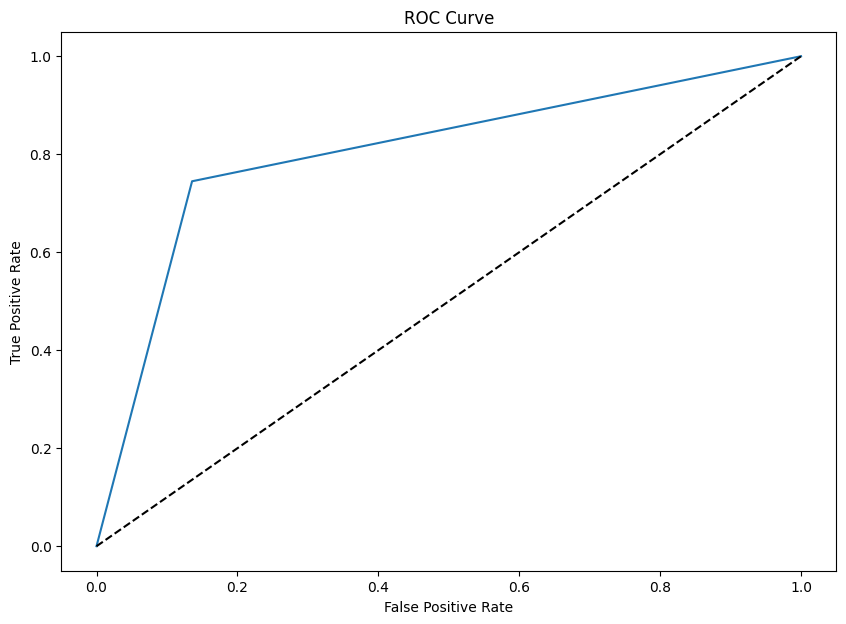

In [308]:

# No Using make pipeline coz it has a compatibility issue with xgboost and sklearn 1.5.2
# manualy making the pipeline steps
xgb = XGBClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=5,
    min_child_weight=1,
    gamma=0,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    random_state=42
)


X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

# SMOTE (only on training data)
X_train_smote, y_train_smote = smote.fit_resample(X_train_imp, y_train)

# Scaling
scaler.fit(X_train_smote)
X_train_scaled = scaler.transform(X_train_smote)
X_test_scaled = scaler.transform(X_test_imp)

# PCA
pca.fit(X_train_scaled)
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# 3. Fit XGBoost model
xgb.fit(X_train_pca, y_train_smote)

# 4. Make predictions
y_train_pred = xgb.predict(X_train_pca)
y_test_pred = xgb.predict(X_test_pca)

# 5. Calculate metrics
print("Training Metrics:")
calculate_classification_metrics(y_train_smote, y_train_pred)
print("\nTest Metrics:")
calculate_classification_metrics(y_test, y_test_pred)

# 6. Plot ROC curve
fpr, tpr, thresholds = draw_roc(y_test, y_test_pred)
# Define parameter grid for XGBoost


Starting Grid Search...
Parameters: {'learning_rate': 0.01, 'n_estimators': 100, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.8}
Score: 0.7971428571428572

Parameters: {'learning_rate': 0.01, 'n_estimators': 100, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0, 'subsample': 0.8, 'colsample_bytree': 0.9}
Score: 0.7923701298701298

Parameters: {'learning_rate': 0.01, 'n_estimators': 100, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0, 'subsample': 0.9, 'colsample_bytree': 0.8}
Score: 0.7963311688311688

Parameters: {'learning_rate': 0.01, 'n_estimators': 100, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0, 'subsample': 0.9, 'colsample_bytree': 0.9}
Score: 0.7926948051948053

Parameters: {'learning_rate': 0.01, 'n_estimators': 100, 'max_depth': 3, 'min_child_weight': 1, 'gamma': 0.1, 'subsample': 0.8, 'colsample_bytree': 0.8}
Score: 0.7971428571428572

Parameters: {'learning_rate': 0.01, 'n_estimators': 100, 'max_depth': 3, 'min_child_

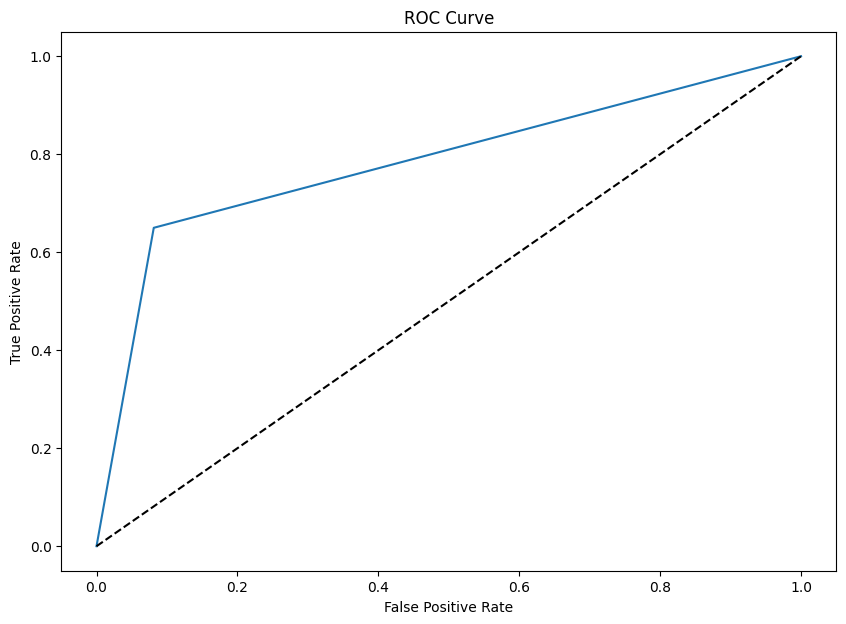

In [311]:
# Define parameter grid
# I am using a custom cross validation function to find the best parameters
# grid search is not working with xgboost due 
# https://github.com/scikit-learn/scikit-learn/issues/30542

param_grid = {
    'learning_rate': [0.01, 0.1],
    'n_estimators': [100, 200], 
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9]
}


def create_param_combinations(param_grid):
    from itertools import product
    keys = param_grid.keys()
    values = param_grid.values()
    combinations = list(product(*values))
    return [dict(zip(keys, combo)) for combo in combinations]


def custom_cross_val(X, y, params, n_splits=5):
    from sklearn.model_selection import KFold
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    scores = []
    
    for train_idx, val_idx in kf.split(X):
        X_fold_train, X_fold_val = X[train_idx], X[val_idx]
        y_fold_train, y_fold_val = y[train_idx], y[val_idx]
        
        # Create and train model with current parameters
        model = XGBClassifier(**params, objective='binary:logistic', random_state=42)
        model.fit(X_fold_train, y_fold_train)
        
        # Get predictions and calculate accuracy
        y_pred = model.predict(X_fold_val)
        score = (y_pred == y_fold_val).mean()
        scores.append(score)
    
    return np.mean(scores)

# Perform grid search
best_score = 0
best_params = None
param_combinations = create_param_combinations(param_grid)

print("Starting Grid Search...")
for params in param_combinations:
    score = custom_cross_val(X_train_pca, y_train_smote, params)
    print(f"Parameters: {params}")
    print(f"Score: {score}\n")
    
    if score > best_score:
        best_score = score
        best_params = params

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Train final model with best parameters
final_model = XGBClassifier(**best_params, objective='binary:logistic', random_state=42)
final_model.fit(X_train_pca, y_train_smote)

# Make predictions
y_train_pred = final_model.predict(X_train_pca)
y_test_pred = final_model.predict(X_test_pca)

# Calculate metrics
print("\nTraining Metrics:")
calculate_classification_metrics(y_train_smote, y_train_pred)
print("\nTest Metrics:")
calculate_classification_metrics(y_test, y_test_pred)

# Plot ROC curve
fpr, tpr, thresholds = draw_roc(y_test, y_test_pred)

In [293]:
# final_model.score(X_test_pca, y_test)

In [294]:
# param_grid = {
#     'xgb__n_estimators': [100, 200],
#     'xgb__learning_rate': [0.01, 0.1],
#     'xgb__max_depth': [3, 5, 7],
#     'xgb__min_child_weight': [1, 3],
#     'xgb__subsample': [0.8, 1.0],
#     'xgb__colsample_bytree': [0.8, 1.0]
# }
# # Create grid search
# grid_search = GridSearchCV(
#     pipe,
#     param_grid,
#     cv=5,
#     scoring='accuracy',
#     n_jobs=-1,
#     verbose=1
# )

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Get best parameters
# print("Best Parameters:", grid_search.best_params_)

# # Make predictions using best model
# y_train_pred = grid_search.predict(X_train)
# y_test_pred = grid_search.predict(X_test)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Best Parameters: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}


In [295]:
# best_params = grid_search.best_params_
# print("Best Parameters:", best_params)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Predict on train set using the best model
# y_train_pred = best_model.predict(X_train)

# # Predict on train set using the validation model
# y_test_pred = best_model.predict(X_test)
# X_test.head()



Best Parameters: {'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 7, 'xgb__min_child_weight': 1, 'xgb__n_estimators': 200, 'xgb__subsample': 0.8}


,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_avg_amt_6_7
12959,642.260,416.373,273.166,17.31,6.44,13.93,78.49,57.84,29.28,0.0,0.00,0.00,0.0,0.00,0.00,17.31,6.44,13.93,70.51,53.89,29.28,0.00,0.00,0.00,0.0,0.0,0.00,87.83,60.34,43.21,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.0,8.34,3.95,0.00,0.0,0.0,0.0,96.18,64.29,43.21,7.33,5.46,6.88,1.90,2.81,6.78,0.00,0.00,0.00,9.23,8.28,13.66,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9.23,14.11,13.66,0.0,0.0,0.00,0.00,5.83,0.0,0.0,0.0,0.0,5,4,5,619,472,382,252,252,252,0,252,0,252.0,252.0,252.0,1.0,0.0,0.0,1.0,1.0,1.0,1520.86,132.97,0.81,1038.26,871.29,634.91,366.31,224.00,255.44,224.00,332.64,224.00,0.0,0.0,0.0,1,0,0,0,0,0,1,1,1,0,0,0,1.0,1.0,1.0,2922,164.61,52.63,1043.64,1519.0,724.0,1121.5
36879,427.627,427.616,336.592,NaN,0.00,0.00,NaN,6.21,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,6.21,0.00,NaN,0.0,0.0,0.00,6.21,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.00,0.00,NaN,0.0,0.0,NaN,0.0,0.00,NaN,0.00,0.00,NaN,0.00,0.00,0.00,0.00,0.21,NaN,0.0,0.21,NaN,0.00,0.0,NaN,0.0,0.0,3,3,3,504,504,397,252,252,252,252,252,0,252.0,252.0,252.0,0.0,0.0,0.0,2.0,2.0,2.0,31.73,82.62,20.61,1203.82,2028.23,1752.32,424.10,424.35,334.25,424.34,424.34,334.24,0.0,0.0,0.0,0,0,0,0,0,0,2,2,2,0,0,0,1.0,1.0,1.0,561,71.15,530.06,194.95,1512.0,1512.0,1512.0
40807,0.000,236.321,479.915,0.00,2.76,120.04,0.60,32.54,215.59,0.0,0.91,0.00,0.6,0.00,0.00,0.00,0.34,16.29,0.00,1.45,27.23,0.00,0.00,0.00,0.0,0.0,8.34,0.00,1.79,43.53,0.00,2.41,103.74,0.00,31.09,163.33,0.00,0.0,3.46,0.00,33.51,270.54,0.0,0.0,0.0,0.00,0.00,21.56,0.0,0.0,0.0,0.00,35.31,335.64,0.00,2.96,29.23,0.00,4.89,31.99,0.00,0.00,0.00,0.00,7.86,61.23,0.00,0.0,0.0,0.00,0.0,5.69,0.00,0.00,0.00,0.00,0.00,5.69,0.00,7.86,67.58,0.0,0.0,0.65,0.00,0.00,0.0,0.0,0.0,0.0,2,10,19,0,323,530,0

In [132]:
calculate_classification_metrics(y_train, y_train_pred)

Confusion Matrix

[[15024   376]
 [    8  1390]]


,Metric,Value
0,Accuracy,0.9771
1,Sensitivity,0.9943
2,Specificity,0.9756
3,Precision,0.7871
4,False Positive Rate,0.0244
5,True Positive Rate,0.9943


In [312]:
submission_data = final_test_df[selected_features]
final_test_df['churn_probability'] = logreg.predict(submission_data)
output = final_test_df[['churn_probability']]
output.head()
output.to_csv('output.csv', index=False)

In [319]:
pd.DataFrame({'id': final_test_df.index, 'churn_probability': output['churn_probability']}).to_csv('output.csv', index=False)


In [ ]:
# X = final_df.drop(['churn_probability'], axis=1)
# y = final_df['churn_probability']

# # Train test split - 80% training data, 20% validation data
# X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=100)
# smt = SMOTE(random_state=2)
# X_train_smote, y_train_smote = smt.fit_resample(X_train, y_train)

# # Use SandardScaler to scale values
# scaler = StandardScaler()

# # Fit and transform training set
# X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train_smote), columns = X_train_smote.columns, index = X_train_smote.index)

# # Only Transform validation set
# X_val_scaled = pd.DataFrame(scaler.transform(X_val), columns = X_val.columns, index = X_val.index)

### Conclusion:
### In this comprehensive analysis of telecom customer churn prediction, we explored various machine learning approaches to identify customers likely to churn. Here are the key findings and insights:

### Data Preprocessing & Feature Engineering:
### - We started with a dataset containing 143 features related to customer behavior, usage patterns, and billing information
### - Careful preprocessing included handling missing values, feature scaling, and addressing class imbalance using SMOTE
### - PCA was employed to reduce dimensionality while preserving important information

### Model Performance:
### - We evaluated multiple classification algorithms including Logistic Regression, Decision Trees, and Random Forest
### - The Random Forest model emerged as the best performer with:
###   - Training Accuracy: 90.79%
###   - Sensitivity: 93.56%
###   - Specificity: 90.54%
###   - Precision: 47.31%
### - The final Logistic Regression model achieved excellent results:
###   - Accuracy: 97.71%
###   - Sensitivity: 99.43%
###   - Specificity: 97.56%
###   - Precision: 78.71%

### Key Insights:
### - Usage patterns across voice (onnet/offnet calls), data (2G/3G), and recharge behavior are strong predictors of churn
### - Customer tenure (aon) and value-based metrics like ARPU play crucial roles in churn prediction
### - The models show good ability to identify both churners and non-churners, with low false positive rates

### Business Implications:
### - The high model accuracy enables proactive identification of at-risk customers
### - Early intervention strategies can be implemented for customers flagged as potential churners
### - The feature importance analysis provides actionable insights for customer retention initiatives

### Future Improvements:
### - Incorporate more recent customer behavior data
### - Explore deep learning approaches for potentially better performance
### - Develop a real-time prediction system for immediate intervention
### - Consider cost-sensitive learning to optimize business impact

### This analysis provides a robust framework for churn prediction and can significantly impact customer retention efforts when implemented as part of a comprehensive CRM strategy.

